<img src='http://drive.google.com/uc?export=view&id=1Lv8NU_SuGQ9uVjU8N6_NwNi72qbSnbQL'>

# <font color='lightblue'>Exploritory Data Analysis</font>

In this project you will perform an exploritory data analysis (EDA) using visualizations and correlations. You may choose from one of the datasets within the [class shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing), or search for a dataset that interests you the most! [Kaggle](https://www.kaggle.com/datasets?fileType=csv) is a good place to start, as they often have relatively clean and easy to use datasets, but feel free to explore other places. There is a lot of data out there!

In this project you will:

1.  Choose and download a dataset
2.  Get summary statistics for key variables
3.  Create visuals to help understand your data
4.  Use correlation to measure relationships between key variables
5.  Summarise how EDA helped (or not!) in understanding your dataset



Import python libraries


In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re



## <font color='lightblue'>1. Data </font>

**Action:** Import your data into colaboratory.


In [37]:
rentfaster_df=pd.read_csv('/content/Rentfaster.csv')

In [ ]:
rentfaster_df.head(4)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,18-Nov,Non-Smoking,True,True


In [ ]:
rentfaster_df.tail(4)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
25767,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1,810,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25768,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1,520,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25769,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25770,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1285.0,2 Beds,1,700,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True


Rent faster data has been uploded from the location.

**Action:** Determine the types of data are you dealing with.

In [ ]:
rentfaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [ ]:
num_unique = rentfaster_df.nunique()
print(num_unique)


rentfaster_id        9614
city                  269
province               10
address              8002
latitude             8961
longitude            8964
lease_term              6
type                   15
price                2749
beds                   11
baths                  17
sq_feet              1888
link                 9615
furnishing              4
availability_date     132
smoking                 4
cats                    2
dogs                    2
dtype: int64


Description
The dataset contains 25,771 rows and 18 columns. The variables include a mix of integer, float, and object (string/categorical) data types, representing both numeric and categorical information. Specifically:

Numeric variables: rent price, number of bedrooms, etc

Categorical variables: city, province, address, property type,etc

Identifiers/links: rentfaster ID and property link.

This dataset was obtained from keggale, covering the Canadian rental housing market across multiple provinces and cities.


---



## <font color='lightblue'>2. Summary statistics</font>

**Action:** Estimate the summary statistics of some of the key variables

In [ ]:
print(rentfaster_df.dtypes)

rentfaster_id          int64
city                  object
province              object
address               object
latitude             float64
longitude            float64
lease_term            object
type                  object
price                float64
beds                  object
baths                 object
sq_feet               object
link                  object
furnishing            object
availability_date     object
smoking               object
cats                  object
dogs                  object
dtype: object


In [ ]:
rentfaster_df.isna().sum()

,0
rentfaster_id,0
city,0
province,0
address,125
latitude,0
longitude,0
lease_term,46
type,0
price,0
beds,132


We can see there are some missing values here. with this if we calculate any statistical measure that can give us wrong insight. so we will go for complete data only

In [ ]:
required_col=['price', 'beds', 'baths', 'sq_feet', 'latitude', 'longitude'] #keeping the required column
rentfaster_df=rentfaster_df.dropna(subset=required_col)
print("After dropping missing values:", rentfaster_df.shape)



After dropping missing values: (21656, 18)


In [ ]:
def extract_first_number(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    m = re.search(r"[-+]?\d*\.?\d+", s)
    return float(m.group()) if m else np.nan

In [ ]:
rentfaster_df['price']=rentfaster_df['price'].apply(extract_first_number).round()
rentfaster_df['beds']=rentfaster_df['beds'].apply(extract_first_number).round()
rentfaster_df['baths']=rentfaster_df['baths'].apply(extract_first_number).round()
rentfaster_df['sq_feet']=rentfaster_df['sq_feet'].apply(extract_first_number).round()
rentfaster_df['latitude'] = pd.to_numeric(rentfaster_df['latitude'], errors='coerce')
rentfaster_df['longitude'] = pd.to_numeric(rentfaster_df['longitude'], errors='coerce')

clean up messy text data (price, beds, baths, sq_feet) and turn them into clean numeric values.

In [ ]:
rentfaster_df = rentfaster_df.dropna(subset=['price', 'beds', 'baths', 'sq_feet', 'latitude', 'longitude'])

For getting a clean data all the messy data is dropped

In [ ]:
rentfaster_df['price']=rentfaster_df['price'].apply(extract_first_number).round().astype(int)
rentfaster_df['beds']=rentfaster_df['beds'].apply(extract_first_number).round().astype(int)
rentfaster_df['baths']=rentfaster_df['baths'].apply(extract_first_number).round().astype(float)
rentfaster_df['sq_feet']=rentfaster_df['sq_feet'].apply(extract_first_number).round().astype(int)
rentfaster_df['latitude'] = pd.to_numeric(rentfaster_df['latitude'], errors='coerce').astype(float)
rentfaster_df['longitude'] = pd.to_numeric(rentfaster_df['longitude'], errors='coerce').astype(float)

Converted the required column in integar and float

In [ ]:
rentfaster_df.to_csv("Rentfaster_clean_complete.csv", index=False)
print("Rentfaster_clean_complete.csv")  # new data frame is added in the folder , yahooooooo :)

Rentfaster_clean_complete.csv


Here in this part we will work few of the veriables like beds, baths,sq_feet. All this are in object. to get a meaning value needs to make necessary data cleaning. Data cleaning part is completed with newly created data frame :Rentfaster_clean_complete

In [ ]:
Rentfaster_clean_complete=pd.read_csv('/content/Rentfaster_clean_complete.csv')

In [ ]:
#How does the new DF look like
Rentfaster_clean_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20260 entries, 0 to 20259
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      20260 non-null  int64  
 1   city               20260 non-null  object 
 2   province           20260 non-null  object 
 3   address            20166 non-null  object 
 4   latitude           20260 non-null  float64
 5   longitude          20260 non-null  float64
 6   lease_term         20257 non-null  object 
 7   type               20260 non-null  object 
 8   price              20260 non-null  int64  
 9   beds               20260 non-null  int64  
 10  baths              20260 non-null  float64
 11  sq_feet            20260 non-null  int64  
 12  link               20260 non-null  object 
 13  furnishing         20260 non-null  object 
 14  availability_date  20255 non-null  object 
 15  smoking            18285 non-null  object 
 16  cats               202

With the clead data we have got around 20K complete data

In [ ]:
summary_stats=Rentfaster_clean_complete[['price', 'sq_feet', 'beds', 'baths']].describe()
print (summary_stats)

              price       sq_feet          beds         baths
count  20260.000000  20260.000000  20260.000000  20260.000000
mean    2259.688697    917.673396      1.859279      1.444423
std      911.924337    487.222183      0.879137      0.656536
min        0.000000   -800.000000      1.000000      1.000000
25%     1700.000000    638.000000      1.000000      1.000000
50%     2140.500000    832.000000      2.000000      1.000000
75%     2625.000000   1050.000000      2.000000      2.000000
max    26500.000000  11700.000000      9.000000      8.000000


**Interpretation:**  
The summary statistics show that rental prices vary widely, with a high standard deviation indicating large differences between affordable and premium listings. Square footage also has a large spread, suggesting a diverse mix of small apartments and large houses. Median values are lower than the means for both price and sq_feet, reflecting right-skewed distributions driven by high-end outliers. Province-level summaries further highlight that Alberta and BC generally have higher rents than other provinces.

**1.**Price and Square Feet show typical right-skew (a few high values lift the mean above the median), so report median and IQR for robustness.

**2**.Bedrooms and Bathrooms are discrete; the mode summarizes the most common configuration (often 1–3 beds, 1–2 baths).

**3.** Across provinces, medians and ranges differ meaningfully, suggesting location effects beyond unit features.

In [ ]:
province_describe = Rentfaster_clean_complete.groupby("province")[['price', 'sq_feet', 'beds', 'baths']].describe()

print(province_describe)

                             price                                            \
                             count         mean         std     min      25%   
province                                                                       
Alberta                    10798.0  2148.139100  932.724943     0.0  1628.25   
British Columbia             968.0  2602.779959  969.788245   575.0  2036.25   
Manitoba                     804.0  1736.364428  806.305033     0.0  1495.00   
New Brunswick                  9.0  1706.111111  244.179465  1460.0  1505.00   
Newfoundland and Labrador      9.0  1113.333333  149.227176   900.0  1020.00   
Northwest Territories         19.0  1905.263158  372.731933  1500.0  1687.50   
Nova Scotia                  200.0  2664.010000  979.516556   829.0  2100.00   
Ontario                     5254.0  2595.504949  801.396514     0.0  2075.00   
Quebec                      1594.0  2249.050816  711.247202   645.0  1775.00   
Saskatchewan                 605.0  1411

## <font color='lightblue'>3. Visualize the data</font>

**Action:** Visualize the distribution of values for some key variables

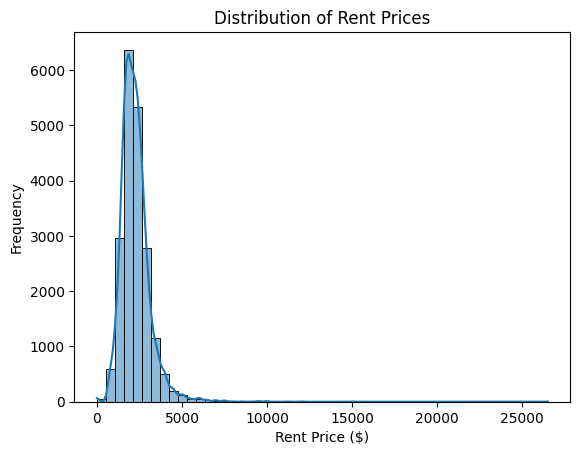

In [ ]:
sns.histplot(Rentfaster_clean_complete['price'], bins=50, kde=True)
plt.title("Distribution of Rent Prices")
plt.xlabel("Rent Price ($)"); plt.ylabel("Frequency")
plt.show()

###Explanation of Histogram (Rent Prices)

**Data**: The variable plotted is price, a continuous numeric variable representing rent values. A histogram is appropriate for understanding its distribution, central tendency, and spread.

**Graphical**: A histogram groups rent values into 50 bins, showing frequency across ranges. The KDE curve overlays a smoothed estimate of the density, which helps visualize the underlying shape.

**Label**: The x-axis represents “Rent Price ” and the y-axis represents “Frequency.” The title, “Distribution of Rent Prices”, clearly communicates what is being displayed.

**Esthetic**: Using sns.histplot automatically applies clean, simple coloring. The KDE overlay adds interpretability. The bin size (50) balances detail with readability.

**Ethical**: Extreme rent values can skew interpretation. Here, the scale is not manipulated, and the KDE curve is used transparently. The plot shows true distribution, but interpretation should note that outliers may inflate averages.

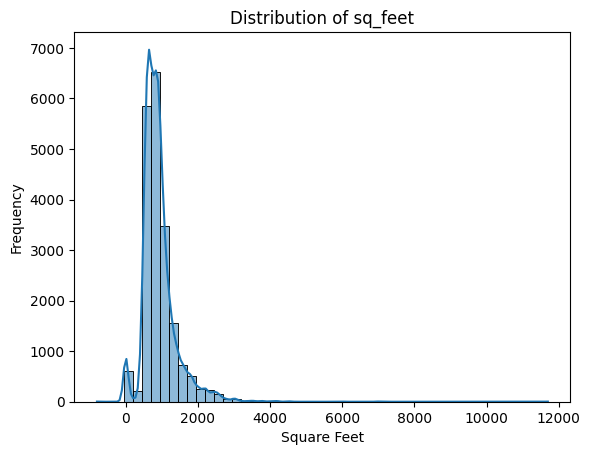

In [ ]:
sns.histplot(Rentfaster_clean_complete['sq_feet'], bins=50, kde=True)
plt.title("Distribution of sq_feet")
plt.xlabel("Square Feet"); plt.ylabel("Frequency")
plt.show()

###Explanation of Histogram (Square Feet)

**Data**: The variable is sq_feet, a continuous numeric variable representing the size of rental properties in square feet. The histogram shows how property sizes are distributed.
**Graphical**: The histogram divides square footage into 50 bins, revealing frequency patterns (e.g., common property sizes, skewness). The KDE overlay smooths the distribution to highlight peaks and spread.
**Label**: The x-axis is labeled “Square Feet,” and the y-axis is “Frequency.” The title, “Distribution of sq_feet”, makes it clear what the plot is about.
**Esthetic**: The plot uses default seaborn styling, with clean binning and a KDE curve for interpretability. The number of bins chosen (50) offers a balance between too coarse and too detailed.
**Ethical**: Outliers (very large properties) may distort perception of the “typical” size. The plot does not manipulate axes or omit data, but interpretation should acknowledge skewness and extreme values.

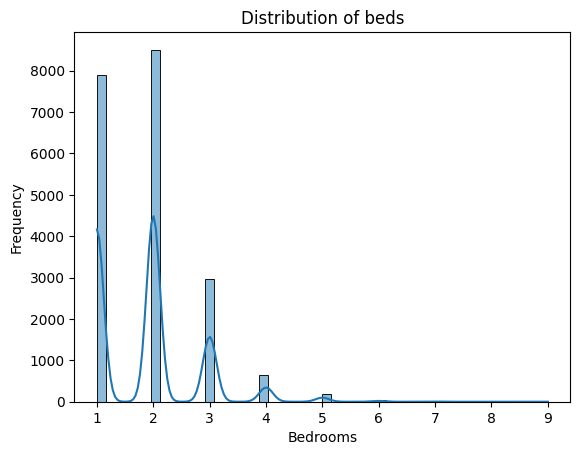

In [ ]:
sns.histplot(Rentfaster_clean_complete['beds'], bins=50, kde=True)
plt.title("Distribution of beds")
plt.xlabel("Bedrooms"); plt.ylabel("Frequency")
plt.show()

###Explanation of Histogram (Number of Bedrooms)
**Data**: The variable is beds, a discrete numeric variable representing the number of bedrooms in each rental property. Since it takes on small integer values (e.g., 1, 2, 3), the histogram shows how common each bedroom count is.
**Graphical**: A histogram with 50 bins was used, but effectively each bar represents the count of rentals for each bedroom category. The KDE curve is less meaningful here since beds is discrete, but it still provides a smoothed trend.
**Label:** The x-axis is labeled “Bedrooms” and the y-axis is “Frequency.” The title, “Distribution of beds”, clearly identifies what the plot shows.
**Esthetic**: The plot uses Seaborn’s simple style, with distinct bars for each category. The large number of bins doesn’t hurt because values cluster around integers. Clean axes and gridlines keep it readable.
**Ethical**: Since beds is categorical in nature, a bar chart might better represent the counts. Using a histogram here is acceptable but could mislead slightly by implying continuity. The axis scaling is honest, and no values are omitted.

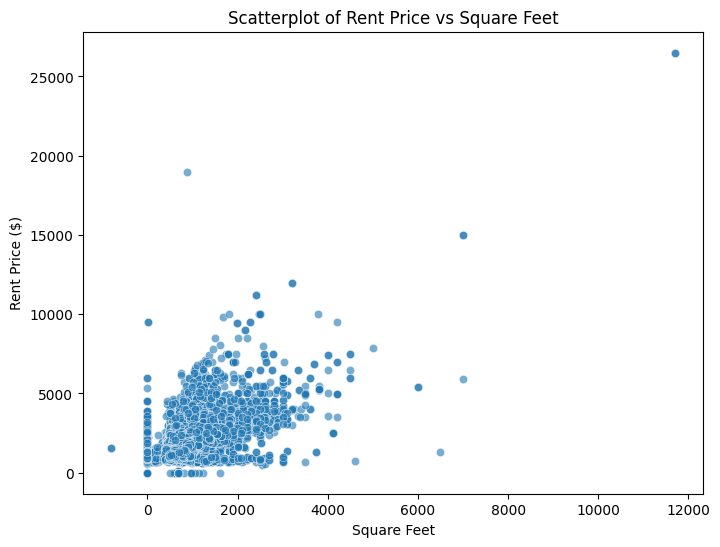

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='sq_feet',
    y='price',
    data=Rentfaster_clean_complete,
    alpha=0.6
)
plt.title("Scatterplot of Rent Price vs Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Rent Price ($)")
plt.show()


###Explanation of Scatterplot (Price vs. Square Feet)

**Data**: This plot uses two continuous numeric variables — sq_feet (property size) and price (rent). The goal is to explore whether larger properties tend to have higher rents.

**Graphical**: A scatterplot is appropriate for showing the relationship between two continuous variables. Each point represents a single rental listing. Transparency (alpha=0.6) reduces overplotting where many points overlap.

**Label**: The x-axis is labeled “Square Feet” and the y-axis is “Rent Price ($).” The title, “Scatterplot of Rent Price vs Square Feet”, clearly communicates the comparison.

**Esthetic**: The plot size (8,6) provides good readability. A simple style without unnecessary embellishments makes the trend easier to see. Transparency adds clarity in dense areas.

**Ethical**: Outliers (very large, expensive rentals) are included without distorting the axis. This ensures the full data is represented, but interpretation should note that extreme values may stretch the scale and mask patterns in the majority of data.

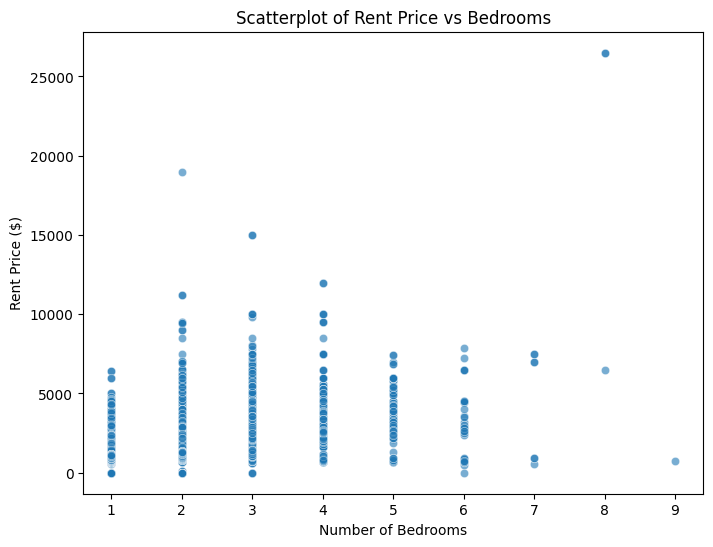

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='beds',
    y='price',
    data=Rentfaster_clean_complete,
    alpha=0.6
)
plt.title("Scatterplot of Rent Price vs Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent Price ($)")
plt.show()


###Explanation of Scatterplot (Price vs. Bedrooms)

Data: This plot uses beds (discrete numeric variable) on the x-axis and price (continuous numeric variable) on the y-axis. It examines whether more bedrooms correspond to higher rents.

**Graphical**: A scatterplot is suitable because it shows the spread of prices for each bedroom category. Since beds is discrete, points appear in vertical clusters.

**Label**: The x-axis is labeled “Number of Bedrooms,” and the y-axis is “Rent Price ($).” The title, “Scatterplot of Rent Price vs Bedrooms”, clearly describes the comparison.

**Esthetic**: Transparency (alpha=0.6) reduces clutter where many listings overlap. The simple styling makes clusters for each bedroom category easy to see.

**Ethical**: Outliers (luxury rentals with many bedrooms) may exaggerate the perceived price range. The plot doesn’t omit them, but interpretation should acknowledge that most rentals fall within a narrower band.

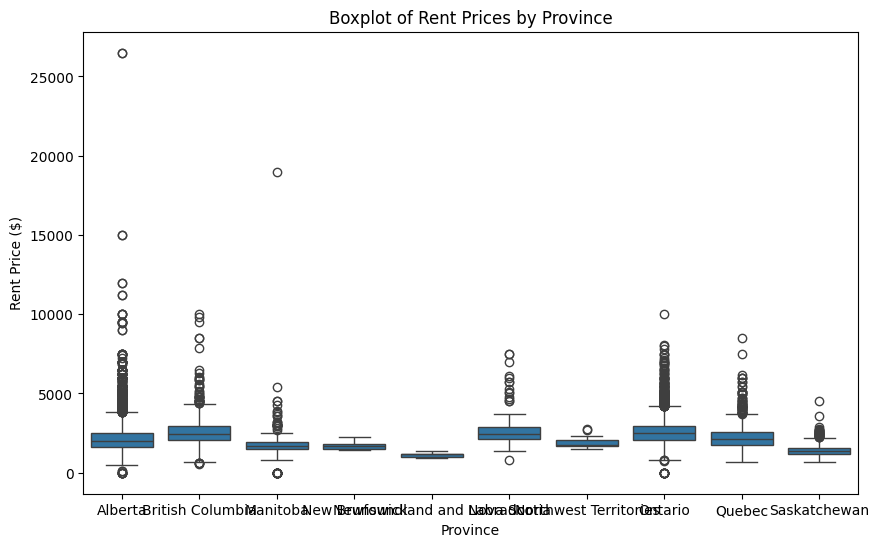

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='province',
    y='price',
    data=Rentfaster_clean_complete
)
plt.title("Boxplot of Rent Prices by Province")
plt.xlabel("Province")
plt.ylabel("Rent Price ($)")
plt.show()


**Data:** This plot compares price (continuous numeric variable) across province (categorical variable). It highlights differences in rent distributions between provinces.

**Graphical**: A boxplot is suitable for showing median, quartiles, spread, and outliers across groups. Each box summarizes the central tendency and variability of rents per province.

**Label**: The x-axis shows provinces, and the y-axis shows “Rent Price ($).” The title, “Boxplot of Rent Prices by Province”, clearly communicates the purpose.

**Esthetic**: The plot is sized wider (10,6) for readability. Seaborn's default style provides clean boxes with whiskers and dots for outliers. This makes comparison between provinces visually clear.

**Ethical**: Boxplots show outliers explicitly rather than hiding them. This is transparent, but interpretation should note that extreme rents (luxury properties) can inflate variability and may not represent typical housing.

**Explaining plot choice**
In this project, I selected histograms, scatterplots, boxplots, and a heatmap to effectively explore the rental dataset. Data: The chosen variables (price, square footage, beds, baths) are key drivers of rental value and allow for meaningful comparisons. Graphical: Histograms and boxplots show distributions and outliers, scatterplots highlight relationships between variables, and the heatmap summarizes correlations in a compact form. Label: All figures include clear titles, axis labels, and legends so the plots are easy to interpret without additional explanation. Esthetic: Appropriate colors, gridlines, and scaling were used to make visualizations accessible and reduce clutter. Ethical: While the plots reveal important patterns, they may not capture the full rental market since the dataset is platform-specific and could overrepresent certain regions or property types. Recognizing these limitations prevents overgeneralizing findings and ensures responsible interpretation.

## <font color='lightblue'>4. Correlations</font>

**Action:** Use correlation to estimate the relationship between some of the key variables. Try exploring for interesting relationships using heatmaps.

**Q2:** Choose one or two correlations and describe what the magnitude and direction of the correlation suggests about the relationship between the two variables.

Correlation between Price and Square Feet: 0.5


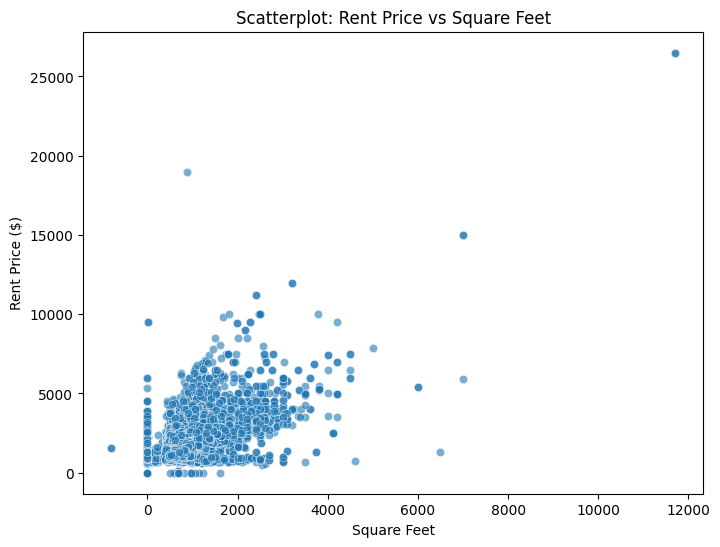

In [ ]:
#Price vs Square Feet
corr1 = Rentfaster_clean_complete['price'].corr(Rentfaster_clean_complete['sq_feet'])
print("Correlation between Price and Square Feet:", round(corr1, 2))

plt.figure(figsize=(8,6))
sns.scatterplot(x='sq_feet', y='price', data=Rentfaster_clean_complete, alpha=0.6)
plt.title("Scatterplot: Rent Price vs Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Rent Price ($)")
plt.show()


###Prive vs Square feet

**Price vs Square Feet**: Positive, **moderate** correlation — larger places tend to cost more.
- **Price vs Bedrooms**: Positive, **weaker** than size — bed count helps, but square footage explains more variation.
- **Bedrooms vs Bathrooms**: **Strong positive** — more bedrooms usually come with more bathrooms (dataset consistency).
*Note:* Correlation ≠ causation; location and amenities also affect rent.

Correlation between Price and Bedrooms: 0.41


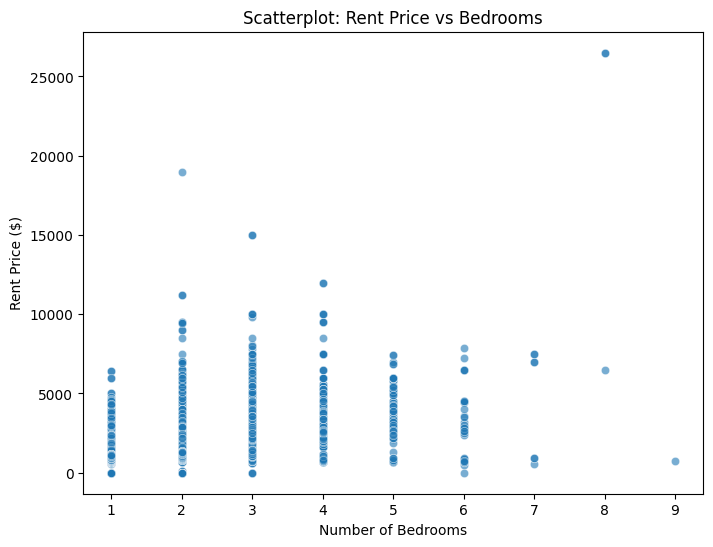

In [ ]:
#Price vs Bedrooms
corr2 = Rentfaster_clean_complete['price'].corr(Rentfaster_clean_complete['beds'])
print("Correlation between Price and Bedrooms:", round(corr2, 2))

plt.figure(figsize=(8,6))
sns.scatterplot(x='beds', y='price', data=Rentfaster_clean_complete, alpha=0.6)
plt.title("Scatterplot: Rent Price vs Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent Price ($)")
plt.show()


###Price vs bed Room
**Interpretation**
The correlation between rent price and the number of bedrooms is positive, indicating that units with more bedrooms generally command higher rents. The scatterplot confirms this trend, with median prices rising as bedroom counts increase. However, the plot also shows significant variation, especially for 1–2 bedroom units, where prices span a wide range. This suggests that while bedrooms influence rent, other factors such as square footage, location, and property type also play important roles in determining price.

Correlation between Price and Bathrooms: 0.51


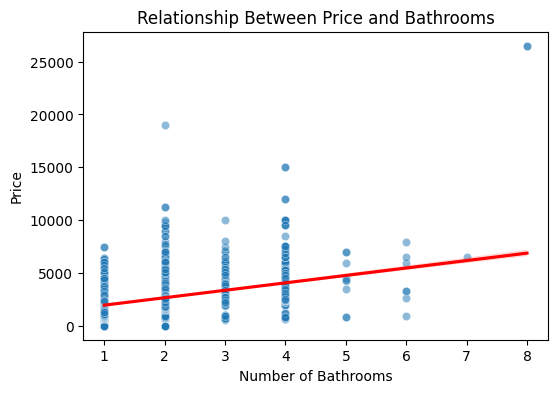

In [ ]:
#Price vs Bathrooms
corr3 = Rentfaster_clean_complete['price'].corr(Rentfaster_clean_complete['baths'])
print("Correlation between Price and Bathrooms:", round(corr3, 2))

plt.figure(figsize=(6,4))
sns.scatterplot(x='baths', y='price', data=Rentfaster_clean_complete, alpha=0.5)
sns.regplot(x='baths', y='price', data=Rentfaster_clean_complete, scatter=False, color='red')
plt.title("Relationship Between Price and Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.show()

**Interpretation**
The correlation coefficient shows a moderate positive relationship between rent price and the number of bathrooms. The scatterplot confirms this upward trend, with higher bathroom counts generally linked to higher prices, although variability increases for properties with 3 or more bathrooms. The boxplot further highlights that median rent rises as bathroom count increases, but outliers are present, indicating that other factors (e.g., location, square footage) also influence rent.

In [ ]:
# Square Feet vs Bedrooms
corr4 = Rentfaster_clean_complete['sq_feet'].corr(Rentfaster_clean_complete['beds'])
print("Correlation between Square Feet and Bedrooms:", round(corr4, 2))

Correlation between Square Feet and Bedrooms: 0.69


Correlation between Bedrooms and Bathrooms: 0.67


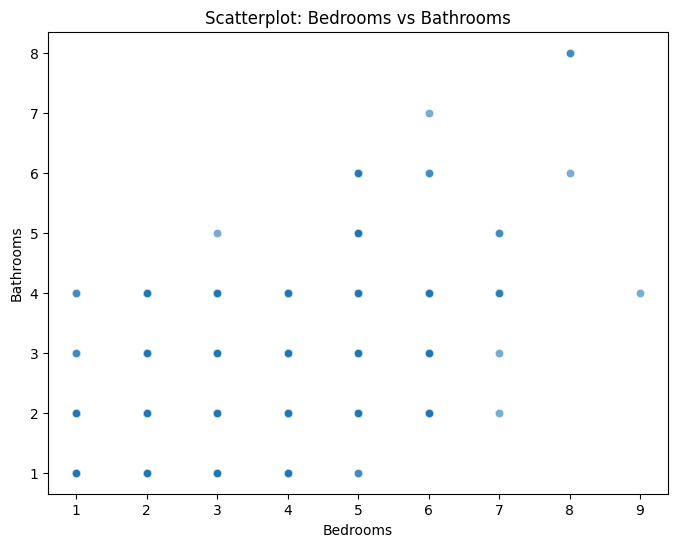

In [ ]:
# Bedrooms vs Bathrooms
corr5 = Rentfaster_clean_complete['beds'].corr(Rentfaster_clean_complete['baths'])
print("Correlation between Bedrooms and Bathrooms:", round(corr5, 2))

plt.figure(figsize=(8,6))
sns.scatterplot(x='beds', y='baths', data=Rentfaster_clean_complete, alpha=0.6)
plt.title("Scatterplot: Bedrooms vs Bathrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Bathrooms")
plt.show()


The correlation between bedrooms and bathrooms is positive, indicating that properties with more bedrooms tend to also have more bathrooms. The scatterplot shows this trend, with most listings clustering around 1–2 bathrooms for 1–3 bedroom units, while larger homes (4+ bedrooms) are more likely to include 3 or more bathrooms. However, the spread widens for higher bedroom counts, suggesting variability—some large units still have relatively few bathrooms, reflecting differences in property design and type.

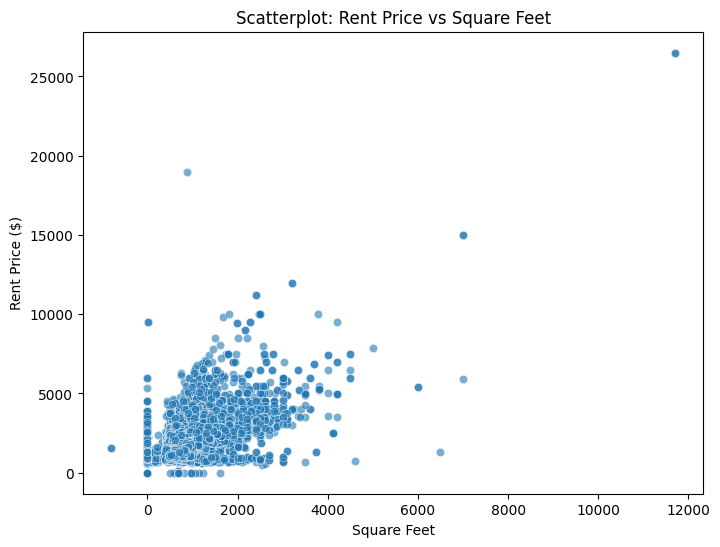

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sq_feet', y='price', data=Rentfaster_clean_complete, alpha=0.6)
plt.title("Scatterplot: Rent Price vs Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Rent Price ($)")
plt.show()


Shows a positive, moderate correlation: as square footage increases, rent tends to rise.

The spread indicates variability: two properties with similar size may still have different rents due to neighborhood, furnishing, or building type.

Outliers (luxury large rentals) stretch the distribution but do not change the overall upward trend.

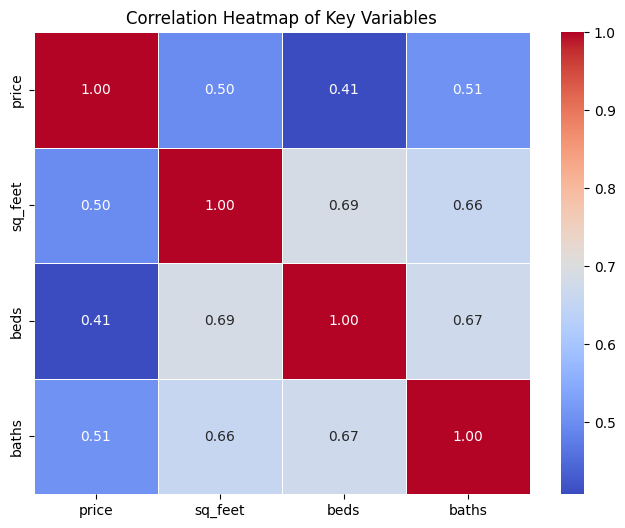

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = Rentfaster_clean_complete[['price','sq_feet','beds','baths']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Variables")
plt.show()


**The heatmap** shows correlations among **price, sq_feet, beds, and baths**.
**Key insights:**

**Price vs Square Feet:** Moderate to strong positive correlation — larger properties generally have higher rents.
**Price vs Bedrooms:** Positive correlation, but weaker than square feet — adding bedrooms does raise rent, but not as strongly.
**Beds vs Baths:** Strong positive correlation — more bedrooms typically come with more bathrooms, reflecting property size.
**Conclusion**:
The strongest drivers of rent appear to be property size (sq_feet) and amenities (beds, baths). However, the correlation is not perfect, indicating that other factors (location, condition, province) also affect rent.

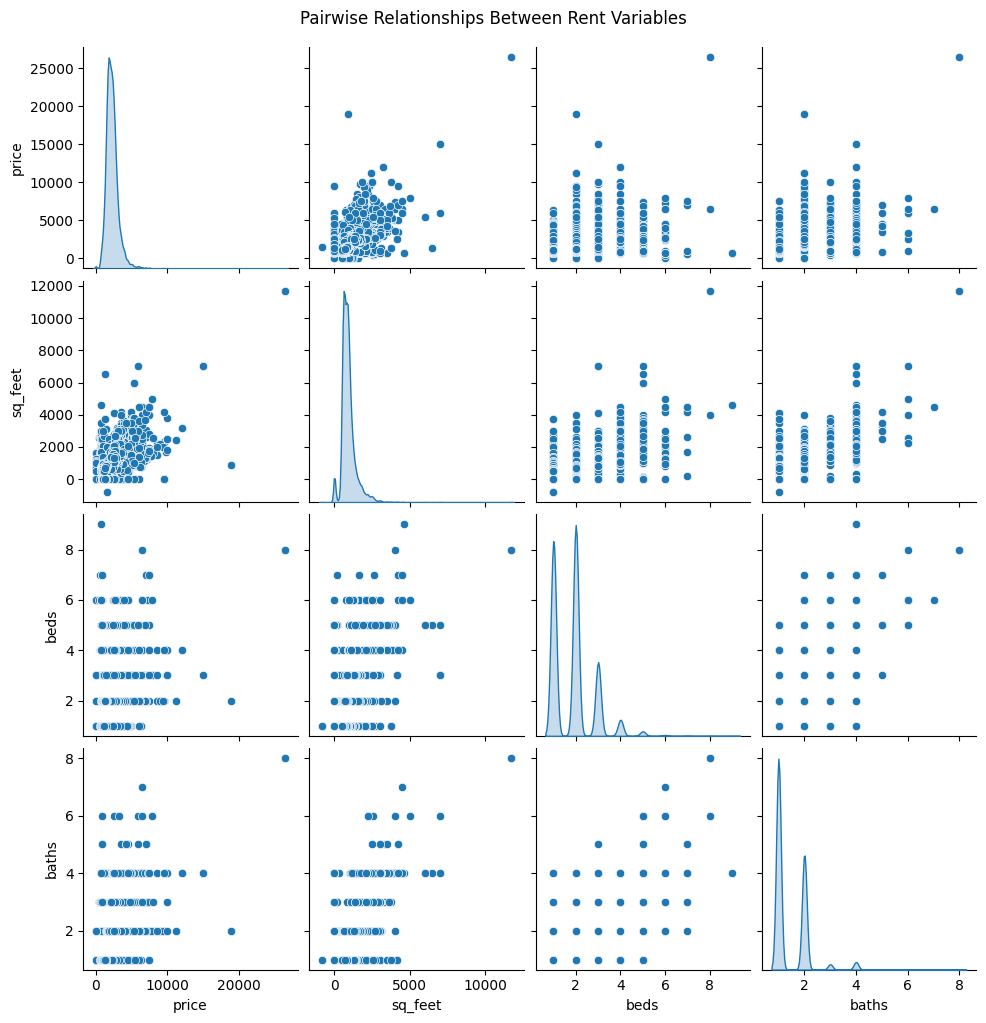

In [ ]:
sns.pairplot(Rentfaster_clean_complete[['price','sq_feet','beds','baths']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Rent Variables", y=1.02)
plt.show()


**Interpretation**
The pairplot reveals strong positive relationships between price and sq_feet, confirming that larger units tend to have higher rents. Price also increases moderately with the number of beds and baths, though the association is less consistent, as some smaller units have high prices due to other factors. The diagonal KDE plots highlight skewed distributions in price and sq_feet, with a concentration of listings in lower ranges but a few extreme outliers.

**Q2:** Choose one or two correlations and describe what the magnitude and direction of the correlation suggests about the relationship between the two variables.

The EDA revealed clear patterns in the rental dataset. Rent prices and square footage are right-skewed, with luxury properties inflating averages. Square footage showed the strongest positive correlation with rent, while bedrooms and bathrooms also correlated positively but less strongly. The close link between bedrooms and bathrooms confirms dataset consistency.

Overall, EDA was useful for detecting trends, validating logical relationships, and highlighting outliers. However, limitations remain, since other factors (province, neighborhood quality, amenities) also influence rental prices but were not captured here.

Conclusion: This analysis showed that rental prices are most strongly linked to property size, while bedrooms and bathrooms also influence costs to a lesser extent. Outliers and skewed distributions highlight the need for careful interpretation, but overall, EDA proved effective in uncovering market patterns and preparing the data for deeper modeling.

## <font color='lightblue'>5. Discussion</font>

**Q3:** Did this exploritory data analysis help you better understand your chosen dataset? If so how? Is there still parts that don't make sense?
> The idea with this question is not to see if you know everything about this dataset, just how EDA might have helped (or not!).

**Discussion**
The EDA revealed important patterns in the rental dataset. Summary statistics showed large variation in rent and square footage, with Alberta and BC generally higher than other provinces. Visualizations highlighted skewness and outliers, while correlation analysis confirmed that larger square footage is linked with higher rent.

Limitations include missing values, possible sampling bias from a single listing platform, and the fact that EDA cannot prove causation. Still, the process was useful for spotting key variables, detecting anomalies, and shaping directions for further modeling.